In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [11]:
task = 'inpaint' #[compsens, deconv, inpaint]

result_file = f'/home/blevac/Diffusion_Inverse/{task}_results/checkpoint.pt'
cont = torch.load(result_file)
print(cont.keys())
gt_img = cont['gt_img']
diff_recon = cont['recon']
meas = cont['meas']
utils = cont['forward_utils']
print('NRMSE: ', cont['nrmse'])

dict_keys(['gt_img', 'recon', 'meas', 'forward_utils', 'nrmse'])
NRMSE:  0.38284416489864864


In [12]:
if task == 'compsens':
    A_pinv = torch.linalg.pinv(utils.A)
    pinv_recon = torch.matmul(meas,A_pinv)
    pinv_recon = pinv_recon.reshape(1,3,gt_img.shape[-2],gt_img.shape[-1])
    adj_img = utils.adjoint(meas)
elif task == 'inpaint':
    adj_img = utils.adjoint(meas)
elif task == 'deconv':
    psf = utils.psf

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


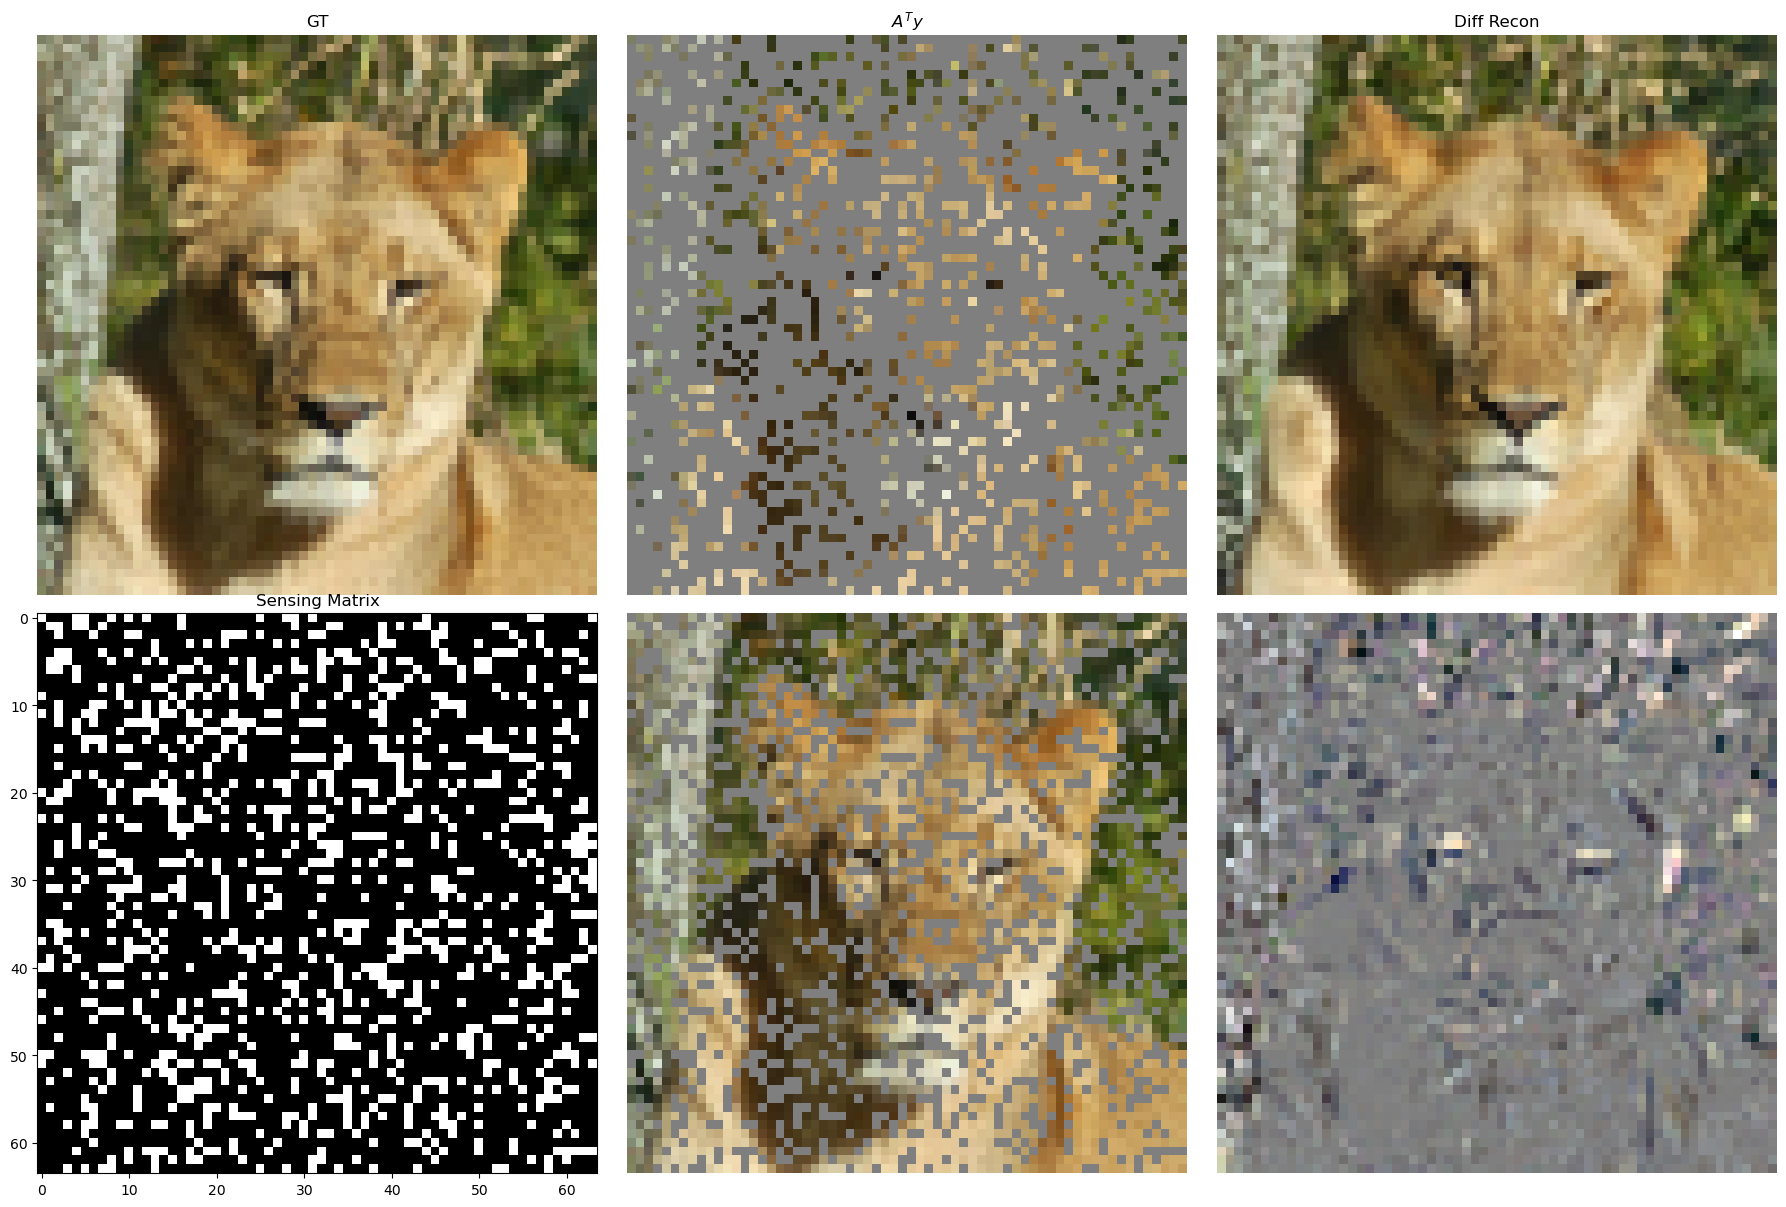

In [13]:
if task == 'compsens':
    plt.figure(figsize=(24,12))
    plt.subplot(2,4,1)
    plt.title('GT')
    plt.imshow((gt_img[0].permute(-2,-1,0).cpu() + 1) /2)
    plt.axis('off')
    plt.subplot(2,4,5)
    plt.title('Sensing Matrix')
    plt.imshow((utils.A.cpu()+1)/2,cmap='gray')
    # plt.axis('off')

    plt.subplot(2,4,2)
    plt.title('$A^Ty$')
    plt.imshow((adj_img[0].permute(-2,-1,0).cpu() + 1) /2)
    plt.axis('off')
    plt.subplot(2,4,7)
    plt.imshow(((gt_img-adj_img)[0].permute(-2,-1,0).cpu() + 1) /2,cmap='gray')
    plt.axis('off')

    plt.subplot(2,4,3)
    plt.title('$A^+y$')
    plt.imshow((pinv_recon[0].permute(-2,-1,0).cpu() + 1) /2)
    plt.axis('off')
    plt.subplot(2,4,7)
    plt.imshow(((gt_img-pinv_recon)[0].permute(-2,-1,0).cpu() + 1) /2,cmap='gray')
    plt.axis('off')

    plt.subplot(2,4,4)
    plt.title('Diff Recon')
    plt.imshow((diff_recon[0].permute(-2,-1,0).cpu() + 1) /2)
    plt.axis('off')
    plt.subplot(2,4,8)
    plt.imshow(((gt_img-diff_recon)[0].permute(-2,-1,0).cpu() + 1) /2,cmap='gray')
    plt.axis('off')
    plt.tight_layout(pad=1.0)

elif task == 'deconv':
    plt.figure(figsize=(24,12))
    plt.subplot(2,4,1)
    plt.title('GT')
    plt.imshow((gt_img[0].permute(-2,-1,0).cpu() + 1) /2)
    plt.axis('off')
    plt.subplot(2,4,5)
    plt.title('PSF')
    plt.imshow(psf[0,0].cpu(),cmap='gray')
    plt.axis('off')

    plt.subplot(2,4,2)
    plt.title('$meas$')
    plt.imshow((meas[0].permute(-2,-1,0).cpu().real + 1)/2 )
    plt.axis('off')
    plt.subplot(2,4,6)
    plt.imshow(((gt_img-meas)[0].permute(-2,-1,0).cpu().real + 1) /2,cmap='gray')
    plt.axis('off')


    plt.subplot(2,4,3)
    plt.title('Diff Recon')
    plt.imshow((diff_recon[0].permute(-2,-1,0).cpu().real + 1) /2)
    plt.axis('off')
    plt.subplot(2,4,7)
    plt.imshow(((gt_img-diff_recon)[0].permute(-2,-1,0).cpu().real + 1) /2,cmap='gray')
    plt.axis('off')
    plt.tight_layout(pad=1.0)

elif task == 'inpaint':
    plt.figure(figsize=(24,12))
    plt.subplot(2,4,1)
    plt.title('GT')
    plt.imshow((gt_img[0].permute(-2,-1,0).cpu() + 1) /2)
    plt.axis('off')
    plt.subplot(2,4,5)
    plt.title('Sensing Matrix')
    plt.imshow(utils.A[0,0].cpu(),cmap='gray')
    # plt.axis('off')

    plt.subplot(2,4,2)
    plt.title('$A^Ty$')
    plt.imshow((adj_img[0].permute(-2,-1,0).cpu() + 1) /2)
    plt.axis('off')
    plt.subplot(2,4,6)
    plt.imshow(((gt_img-adj_img)[0].permute(-2,-1,0).cpu() + 1) /2,cmap='gray')
    plt.axis('off')


    plt.subplot(2,4,3)
    plt.title('Diff Recon')
    plt.imshow((diff_recon[0].permute(-2,-1,0).cpu() + 1) /2)
    plt.axis('off')
    plt.subplot(2,4,7)
    plt.imshow(((gt_img-diff_recon)[0].permute(-2,-1,0).cpu() + 1) /2,cmap='gray')
    plt.axis('off')
    plt.tight_layout(pad=1.0)
